In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#เปลี่ยนเป็น Directory ของตัวเอง
train_base = 'C:/Users/n_int/Desktop/Shopee/train'
test_base = 'C:/Users/n_int/Desktop/Shopee/test'
# train_base = 'C:/Users/natdanai.intraraksa/Documents/Knowledge/Shopee/train'
# test_base = 'C:/Users/natdanai.intraraksa/Documents/Knowledge/Shopee/test'
train_dir = os.path.join(train_base,'train')
test_dir = os.path.join(test_base,'test')

In [12]:
dir_01 = os.path.join(train_dir,'01')
dir_01_name = os.listdir(dir_01)
print(dir_01_name[:5])
print(len(dir_01_name))

['00097dc3925741e3e1e3d87f8d0f2de1.jpg', '001a4f67b8d61a9269b9bb873174f77f.jpg', '00238db878fdf555edc96e32146050ee.jpg', '0025cda0dc6135fc2a4a3bb93859714f.jpg', '002e61675eefed2d07e28d07d6e9abc8.jpg']
2703


In [5]:
# train_df = pd.read_csv('C:/Users/natdanai.intraraksa/Documents/Knowledge/Shopee/train.csv')
# test_df = pd.read_csv('C:/Users/natdanai.intraraksa/Documents/Knowledge/Shopee/test.csv')
train_df = pd.read_csv('C:/Users/n_int/Desktop/Shopee/train.csv')
test_df = pd.read_csv('C:/Users/n_int/Desktop/Shopee/test.csv')

In [7]:
train_df.head()

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


In [9]:
label_count = pd.value_counts(train_df.category)
label_count = label_count.sort_index()
print(label_count[:5])

0    2683
1    2702
2    2687
3    2703
4    2703
Name: category, dtype: int64


In [10]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

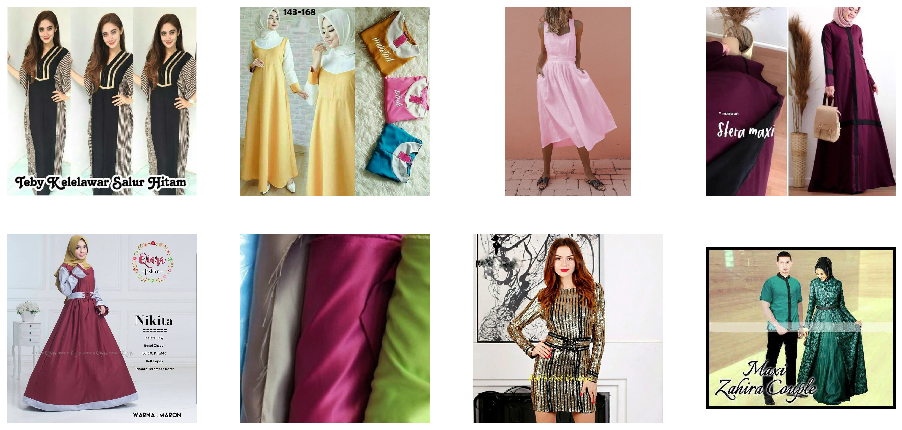

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_goods_pix = [os.path.join(dir_01, fname) 
                for fname in dir_01_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_goods_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [43]:
#what file isn't picture file
directory = []
wired_file = []
for i,j in enumerate(os.listdir(train_dir)):
    directory = os.listdir(os.path.join(train_dir,j))
    if label_count[i] == len(directory):
        continue
    else:
        print("folder {} is NG length of folder is {} and lenght of label is {}".format(i,len(directory),label_count[i]))
        for pic in directory:
            if pic not in list(train_df['filename'][train_df['category']==i]):
                print(pic)
                wired_file.append((i,pic))

folder 1 is NG length of folder is 2703 and lenght of label is 2702
4e658733865eebe2461c322a54379e7f.jpg8afrrohw.tmp
folder 7 is NG length of folder is 2661 and lenght of label is 2660
6b6e7a2db5acf395ee36077808f32e3d.jpgt13z3ib7.tmp
folder 10 is NG length of folder is 2673 and lenght of label is 2672
8235bf4e577b890f5a5ecfda00951f84.jpgt3reyw1v.tmp
folder 14 is NG length of folder is 2685 and lenght of label is 2684
a6f9b9e65c3576a64452961a21678395.jpg95ta80mt.tmp
folder 18 is NG length of folder is 2104 and lenght of label is 2103
4af102e634973b11e5ab90cdee121a6d.jpgt0581za2.tmp
folder 20 is NG length of folder is 2654 and lenght of label is 2653
b4c1a220fd3a43961017717d953fb4e5.jpgk4d4lnxk.tmp


4e658733865eebe2461c322a54379e7f.jpg8afrrohw.tmp
6b6e7a2db5acf395ee36077808f32e3d.jpgt13z3ib7.tmp
8235bf4e577b890f5a5ecfda00951f84.jpgt3reyw1v.tmp
a6f9b9e65c3576a64452961a21678395.jpg95ta80mt.tmp
4af102e634973b11e5ab90cdee121a6d.jpgt0581za2.tmp
b4c1a220fd3a43961017717d953fb4e5.jpgk4d4lnxk.tmp


In [14]:
test_df.head()

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

#model
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(300,300,3),padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Flatten())
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

W0625 21:56:31.961758 13120 deprecation.py:506] From C:\Users\n_int\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
